In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

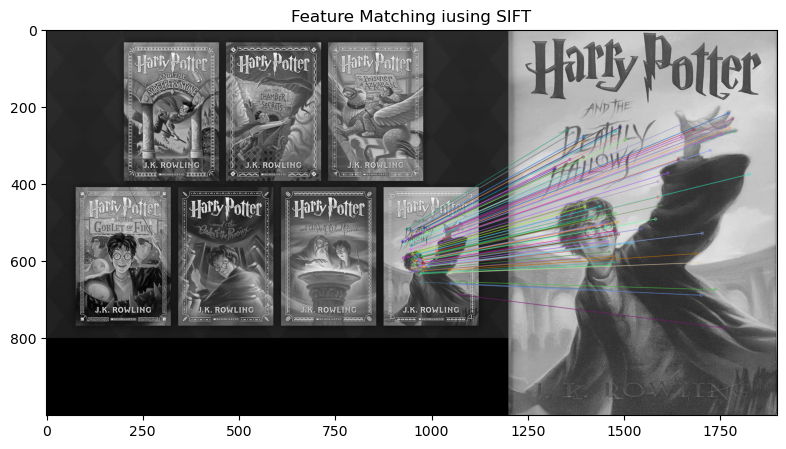

In [7]:
image1 = cv2.imread("harry_collage.jpg", 0)
image2 = cv2.imread("harry_single.jpg", 0)

sift = cv2.SIFT_create()
keypoints1, descriptiors1= sift.detectAndCompute(image1, None)
keypoints2, descriptiors2= sift.detectAndCompute(image2, None)  

bf = cv2.BFMatcher()

matched = bf.knnMatch(descriptiors1, descriptiors2, k=2)

good_mathces = []
for m,n in matched:
    if m.distance < 0.5*n.distance:
        good_mathces.append(m)

matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_mathces, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(10,5))
plt.imshow(matched_image)
plt.title("Feature Matching iusing SIFT")
plt.show()